In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install pandas numpy matplotlib seaborn plotly ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install jupyterlab_widgets

Note: you may need to restart the kernel to use updated packages.


In [4]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

In [5]:
df =  pd.read_csv("C:/Users/HP/Documents/Coffee Sales/Coffee Sales Merged.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   money        3898 non-null   float64
 4   coffee_name  3898 non-null   object 
dtypes: float64(1), object(4)
memory usage: 152.4+ KB


In [7]:
df.describe()

,money
count,3898.00000
mean,31.38060
std,5.06461
min,15.00000
25%,27.92000
50%,32.82000
75%,35.76000
max,40.00000


In [8]:
df.shape[0]

3898

In [9]:
df.shape[1]

5

## KPIs

In [10]:
total_sales = df['date'].count()
total_revenue = df['money'].sum()
avg_price_of_coffee = total_revenue / total_sales
no_of_coffee_type = df['coffee_name'].nunique()

print(f"Total Sales: {total_sales:,}")
print(f"Total Revenue: ${total_revenue:,.0f}")
print(f"Avg Price: ${avg_price_of_coffee:.1f}")
print(f"Coffee Types: {no_of_coffee_type}")

Total Sales: 3,898
Total Revenue: $122,322
Avg Price: $31.4
Coffee Types: 34


### Total Sales by Day of Week

In [11]:
# --- Prepare date columns ---
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df['day_name'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

# --- Interactive Function ---
def plot_sales(year, month):
    filtered_df = df.copy()
    if year != "All":
        filtered_df = filtered_df[filtered_df['year'] == year]
    if month != "All":
        filtered_df = filtered_df[filtered_df['month_name'] == month]
    
    sales_by_day = filtered_df.groupby('day_name', observed=False)['date'].count()
    
    ax = sales_by_day.plot(kind = 'bar', figsize = (10,5), color = 'green', edgecolor = 'black')
    plt.title(f"Total Sales by Day of Week ({year}, {month})")
    plt.xlabel("Day of Week")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=0)
    
    for i, val in enumerate(sales_by_day.values):
        plt.text(i, val, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# --- Create Slicers (Dropdowns) ---
year_options = ["All"] + sorted(df['year'].dropna().unique().tolist())
month_options = ["All"] + df['month_name'].dropna().unique().tolist()

interact(
    plot_sales,
    year=widgets.Dropdown(options=year_options, value="All", description="Year:"),
    month=widgets.Dropdown(options=month_options, value="All", description="Month:")
);

interactive(children=(Dropdown(description='Year:', options=('All', 2024, 2025), value='All'), Dropdown(descri…

### Total Salesby Hour of the Day

In [42]:
df['datetime'] = pd.to_datetime(df['datetime'], format = '%H:%M:%S')
df['order_hour'] = df['datetime'].dt.hour
df['day_name'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

def plot_sales_hour(year, month):
    filtered_df = df.copy()
    if year != "All":
        filtered_df= filtered_df[filtered_df['year'] ==year]
    if month != "All":
        filtered_df= filtered_df[filtered_df['month_name'] ==month]

    orders_by_hour = filtered_df.groupby('order_hour', observed=False)['date'].nunique()
    
    ax = orders_by_hour.plot(kind = 'bar', figsize = (10,5), color = 'green', edgecolor = 'black')
    
    plt.title("Total Sales by Hour of Day")
    plt.xlabel("Hour of Day(24-Hour format)")
    plt.ylabel("Quantity Sold")
    plt.xticks(rotation=0)
    
    for i, val in enumerate(orders_by_hour):
        plt.text(i, val + 2, str(val), ha = 'center', va = 'bottom', fontsize = 9, fontweight = 'bold')
    
    plt.tight_layout()
    plt.show()

year_options = ["All"] + sorted(df['year'].dropna().unique().tolist())
month_options = ["All"] + df['month_name'].dropna().unique().tolist()

interact(
    plot_sales_hour,
    year=widgets.Dropdown(options=year_options, value="All", description="Year:"),
    month=widgets.Dropdown(options=month_options, value="All", description="Month:")
);

interactive(children=(Dropdown(description='Year:', options=('All', 2024, 2025), value='All'), Dropdown(descri…

### Total Revenue by Day of Week

In [13]:
df['date'] = pd.to_datetime(df['date'],dayfirst = True, errors = 'coerce')
df['day_name'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)

def chart_revenue(year, month):
    filtered_df = df.copy()
    if year != "All":
        filtered_df = filtered_df[filtered_df['year'] == year]
    if month != "All":
         filtered_df = filtered_df[filtered_df['month_name'] == month]
        
    revenue_by_day = filtered_df.groupby('day_name', observed = False)['money'].sum()
    ax = revenue_by_day.plot(kind = 'bar', figsize = (10,5), color = 'green', edgecolor = 'black')
    
    plt.title("Total Revenue by Day Of the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=0)

    for i, val in enumerate(revenue_by_day):
        plt.text(i, val + 20, f"${val:,.0f}", ha = 'center', va = 'bottom', fontsize = 9, fontweight = 'bold')
    
    plt.tight_layout()
    plt.show

year_options = ["All"] + sorted(df['year'].dropna().unique().tolist())
month_options = ["All"] + df['month_name'].dropna().unique().tolist()

interact(
    chart_revenue,
    year=widgets.Dropdown(options=year_options, value="All", description="Year:"),
    month=widgets.Dropdown(options=month_options, value="All", description="Month:")
);

interactive(children=(Dropdown(description='Year:', options=('All', 2024, 2025), value='All'), Dropdown(descri…

### Monthly Sales

In [14]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True, errors = 'coerce')
df['month_name'] = df['date'].dt.month_name()
month_order =["January","February","March","April","May","June","July","August","September","October","November","December"]
df['month_name'] = pd.Categorical(df['month_name'],categories=month_order,ordered = True)
df['year'] = df['date'].dt.year

def plot_sales(year):
    filtered_df = df.copy()
    if year != "All":
        filtered_df = filtered_df[filtered_df['year'] == year]
    
    orders_by_month = filtered_df.groupby('month_name', observed=False)['date'].nunique()

    
    plt.figure(figsize = (10,5))
    plt.fill_between(orders_by_month.index, orders_by_month.values, color= "orange", alpha = 0.6)
    plt.plot(orders_by_month.index, orders_by_month.values, color = "black", linewidth = 2, marker = 'o')
    
    plt.title("Total Sales by Month")
    plt.xlabel("Month")
    plt.ylabel("Quantity Sold")
    plt.xticks(rotation=0)
    
    for i, val in enumerate(orders_by_month):
        plt.text(i, val + 1, str(val), ha = 'center', va = 'bottom', fontsize = 9, fontweight = 'bold')

    plt.tight_layout()
    plt.show()
    

year_options = ["All"] + sorted(df['year'].dropna().unique().tolist())

interact(
    plot_sales,
    year=widgets.Dropdown(options=year_options, value="All", description="Year:"),
);

interactive(children=(Dropdown(description='Year:', options=('All', 2024, 2025), value='All'), Output()), _dom…

### Revenue Distribution By Payment Method

In [36]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True, errors = 'coerce')
df['day_name'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year

def plot_revenue(year, month):
    filtered_df = df.copy()
    if year != "All":
        filtered_df= filtered_df[filtered_df['year'] ==year]
    if month != "All":
        filtered_df= filtered_df[filtered_df['month_name'] ==month]
        
    revenue_by_type = filtered_df.groupby('cash_type')['money'].sum()
    labels = [f"{cat}: ₦{val:,.0f}" for cat, val in zip(revenue_by_type.index, revenue_by_type.values)]
    plt.figure(figsize = (7,7))
    colors = plt.get_cmap('tab20').colors
    plt.pie(revenue_by_type, labels = labels, startangle = 90, colors = colors, wedgeprops = {'edgecolor': 'black', 'width':0.4})
    plt.show()

year_options = ["All"] + sorted(df['year'].dropna().unique().tolist())
month_options = ["All"] + df['month_name'].dropna().unique().tolist()

interact(
    plot_revenue,
    year=widgets.Dropdown(options=year_options, value="All", description="Year:"),
    month=widgets.Dropdown(options=month_options, value="All", description="Month:")
);

interactive(children=(Dropdown(description='Year:', options=('All', 2024, 2025), value='All'), Dropdown(descri…

### Top 5 Best Selling Coffee Type By Revenue

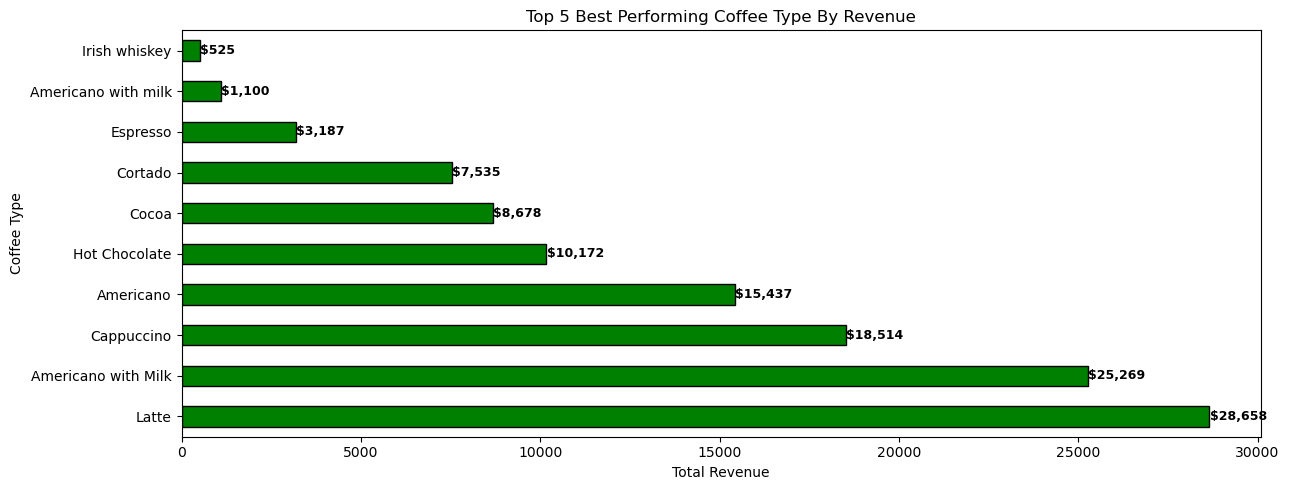

In [83]:
coffee_by_name = df.groupby('coffee_name')['money'].sum()
top5 = coffee_by_name.sort_values(ascending = False).head(10)
ax = top5.plot(kind = 'barh', figsize = (13,5), color = 'green', edgecolor = 'black')

plt.title("Top 5 Best Performing Coffee Type By Revenue")
plt.ylabel("Coffee Type")
plt.xlabel("Total Revenue")

for i, val in enumerate(top5):
   plt.text(val + 3, i, f"${val:,.0f}", ha = 'left', va='center', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

### Bottom 5 Least Selling Coffee Type By Revenue

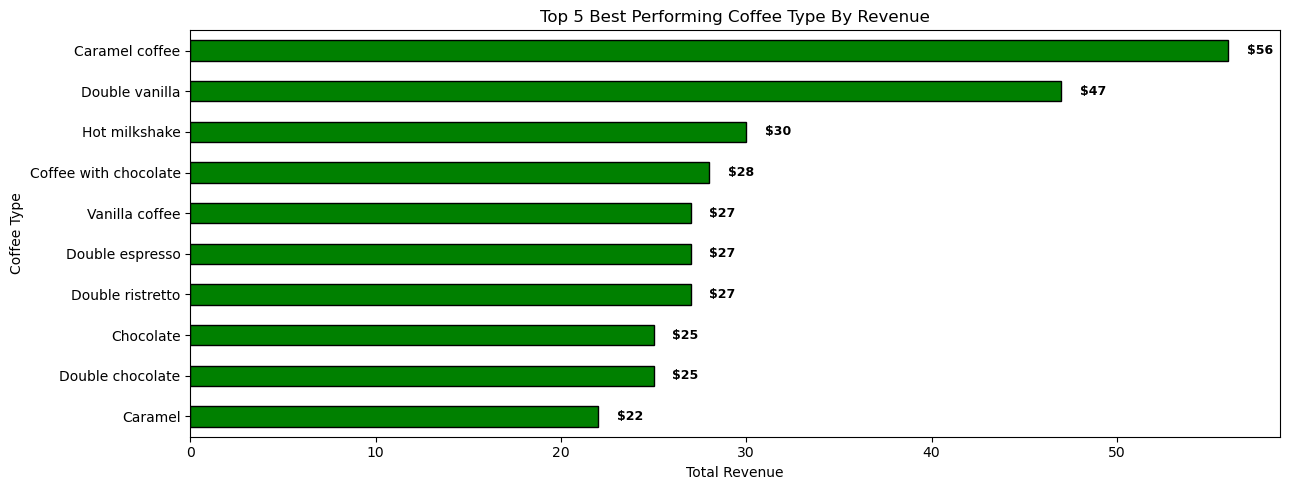

In [82]:
coffee_by_name = df.groupby('coffee_name')['money'].sum()
top5 = coffee_by_name.sort_values(ascending = True).head(10)
ax = top5.plot(kind = 'barh', figsize = (13,5), color = 'green', edgecolor = 'black')

plt.title("Top 5 Best Performing Coffee Type By Revenue")
plt.ylabel("Coffee Type")
plt.xlabel("Total Revenue")

for i, val in enumerate(top5):
   plt.text(val + 1, i, f"${val:,.0f}", ha = 'left', va='center', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()